# NanoSolveIT KB and eNanoMapper Ontology
This notebook generates some visualizations about the usage of eNanoMapper ontology terms described to use either a nanomaterial or measurement variable in the NanoSolveIT Knowledge Base.

# Imports

In [2]:
import numpy as np
import pandas as pd
import re
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
import preprocess as prep
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
from itables import show
from rdflib import Graph, URIRef, BNode, Literal, Namespace

# Data preprocessing
The data received from the partners is a result of the following query against the NanoSolveIT Knowledge Base:
> Which eNM-ontology terms are used in the NanoSolveIT KB to describe either a Nanomaterial or any Measurement Variable

In [3]:
data = prep.do_preprocess()
show(data)
print("Table 1. Data provided by Biomax")

Table 1. Data provided by Biomax


# Visualization
## Usage of eNanoMapper terms in the NanoSolveIT KB
The following charts use the [Plotly Sunburst chart](https://plotly.com/python/sunburst-charts/) to visualize how the NanoSolveIT KB is represented in the eNanoMapper ontology in terms of nanomaterial or variable description, presence in datasets, and links to OECD guidelines.

Click on any ring segment to expand

In [22]:


# Preprocess the data to obtain the columns needed for sunburst charting
from code import interact
from turtle import width
from unittest import makeSuite


datasb = pd.DataFrame(columns = ["eNanoMapper terms", "type", "iri", "label", "Number of observations"])
vars = ["nanomaterial", "variable", "oecd_guideline", "dataset"]
for var in vars:
    df = data[data[var]!=""][["iri", "label", var]].rename(columns={var:"target"})
    df["Number of observations"] = [1 for i in range(len(df["iri"]))]
    df["eNanoMapper terms"] = ["eNanoMapper terms" for i in range(len(df["iri"]))]
    df["type"] = [var for i in range(len(df["iri"]))]
    datasb = pd.concat([datasb, df], axis=0)

def make_sb(datasb, field):
    if field !="all":
        figdata = datasb[datasb["type"] == field]  
        fig = px.sunburst(figdata,
                    path = ["eNanoMapper terms", "iri", "label", "target"], values = "Number of observations",
                    width=700, height=700)
    else:
        figdata = datasb
        fig = px.sunburst(figdata,
                    path = ["eNanoMapper terms", "type", "iri", "label", "target"], values = "Number of observations",
                    width=1000, height=1000)
    return fig


nm = make_sb(datasb, "nanomaterial")
ds = make_sb(datasb, "dataset")
va = make_sb(datasb, "variable")
og = make_sb(datasb, "oecd_guideline")
fig1 = make_subplots(rows=1, cols=2, specs=[
    [{"type": "sunburst"}, {"type": "sunburst"}]],
    subplot_titles=["Fig 1. eNanoMapper terms used to describe nanomaterials or nanoparticles", "Fig 2. Datasets containing eNanoMapper terms and the variables they refer to"])
fig2 = make_subplots(rows=1, cols=2, specs=[
    [{"type": "sunburst"}, {"type": "sunburst"}]],
    subplot_titles=["Fig. 3. eNanoMapper terms used to describe assayed variables", "Fig4. Usage of eNanoMapper terms in reference to OECD guidelines"])
fig1.add_trace(nm.data[0], row=1, col=1)
fig1.add_trace(ds.data[0], row=1,col=2)
fig2.add_trace(va.data[0], row=1,col=1)
fig2.add_trace(og.data[0], row=1,col=2)
fig1.update_layout(height=700, width=1400,)
fig1.show()
fig2.update_layout(height=700, width=1400,)
fig2.show()


## Visualizing the terms in the ontology
The [eNanoMapper ontology](google.com) graph is visualized to find which terms are being used in the KB.

In [17]:
g = Graph()
g =  g.parse("https://raw.githubusercontent.com/jmillanacosta/ontologies/master/enanomapper-full.owl", format = "xml")
# Build nodes
## A triple for each NPXXXXX (nanoparticles in the NanoSolveIT KB)
datasb.drop_duplicates(inplace=True)
nm =  datasb[datasb["type"] == "nanomaterial"].append(datasb[datasb["type"] == "variable"]) 

from rdflib.namespace import RDF

for i, j in nm.iterrows():
    curie = j[2]
    nano = j[5]
    # Create namespaces for NPO, CHEBI, CHEMINF, ENM
    ##switch
    #query = """INSERT DATA {<> <> <> } """.format()
    #print(query)
    #g.update(query)
#g.serialize(format="turtle", destination="eNM_nm.ttl")


/tmp/ipykernel_167941/1593129635.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



INSERT { <NP00923> a owl:NamedIndividual .
                             <NP00923> a ?class . }
                            WHERE { ?class npo:code "NPO_606"  }
INSERT { <NP00924> a owl:NamedIndividual .
                             <NP00924> a ?class . }
                            WHERE { ?class npo:code "NPO_606"  }
INSERT { <NP00925> a owl:NamedIndividual .
                             <NP00925> a ?class . }
                            WHERE { ?class npo:code "NPO_606"  }
INSERT { <NP00926> a owl:NamedIndividual .
                             <NP00926> a ?class . }
                            WHERE { ?class npo:code "NPO_606"  }
INSERT { <NP00930> a owl:NamedIndividual .
                             <NP00930> a ?class . }
                            WHERE { ?class npo:code "NPO_606"  }
INSERT { <NP00931> a owl:NamedIndividual .
                             <NP00931> a ?class . }
                            WHERE { ?class npo:code "NPO_606"  }
INSERT { <NP00932> a owl:NamedIndividual

ParseException: Expected end of text, found 'INSERT'  (at char 0), (line:1, col:1)

## Protégé
![imageProtege](data/imgs/protege_nps.png)

/tmp/ipykernel_167941/3980661508.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



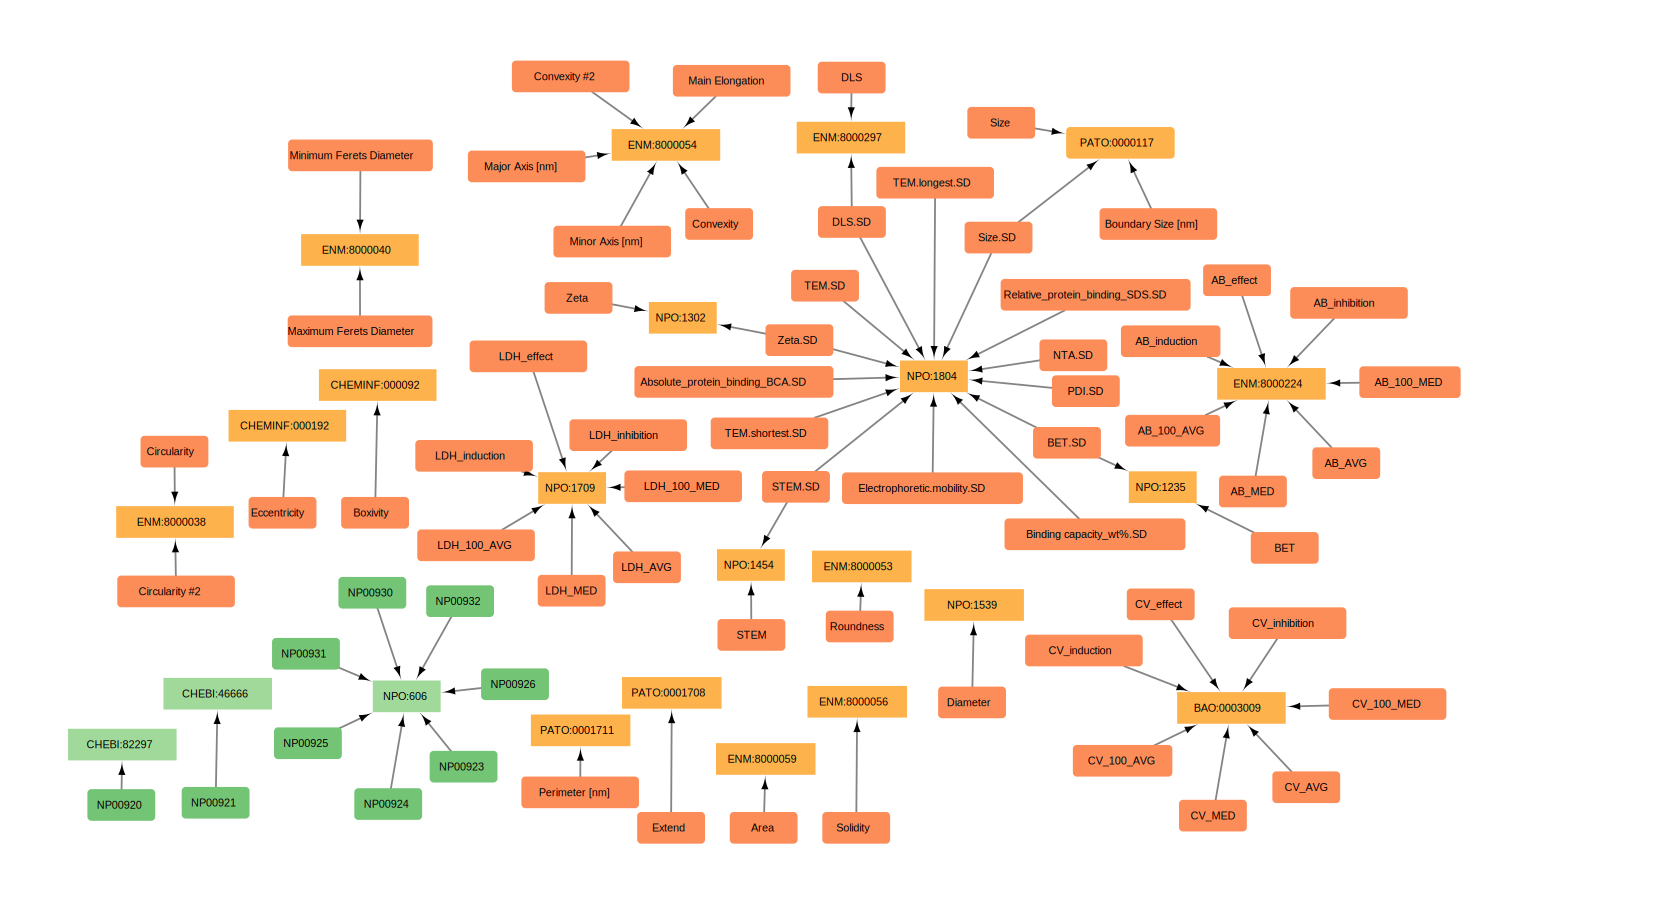

In [26]:
datasb.drop_duplicates(inplace=True)
datasb = datasb[datasb["type"] == "nanomaterial"].append(datasb[datasb["type"] == "variable"]) 
datasb.loc[(datasb.type == 'nanomaterial'),'type']='named nano'
datasb.loc[(datasb.type == 'database'),'type']='appears in'
datasb.loc[(datasb.type == 'oecd_guideline'),'type']='appears in'
datasb.loc[(datasb.type == 'variable'),'type']='named variable'

# Viz in cytoscape
from IPython.display import SVG, display
display(SVG("datagraph.csv.svg"))

In [65]:
query = """
SELECT ?a WHERE { ?a a owl:Class .
FILTER (IRI(?a)=<http://purl.bioontology.org/ontology/npo#NPO_1302>) }
                  """

a = g.query(query)
print([i for i in a])

[(rdflib.term.URIRef('http://purl.bioontology.org/ontology/npo#NPO_1302'),)]
